Avaliable genomes:

In [1]:
library(BSgenome)
library(rtracklayer)
library(stringr)
library(data.table)
library(dplyr)
library(ggplot2)
library(ggrepel)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The

## 1. Selecting avaliable genomes from public data

In [13]:
genomes_avail <- ucscGenomes()

In [14]:
head(genomes_avail)

,db,species,date,name
,<fct>,<fct>,<fct>,<fct>
1,hg38,Human,Dec. 2013,Genome Reference Consortium GRCh38
2,hg19,Human,Feb. 2009,Genome Reference Consortium GRCh37
3,hg18,Human,Mar. 2006,NCBI Build 36.1
4,hg17,Human,May 2004,NCBI Build 35
5,hg16,Human,Jul. 2003,NCBI Build 34
6,vicPac2,Alpaca,Mar. 2013,Broad Institute Vicugna_pacos-2.0.1


In [2]:
species_annot <- fread("../../meta/Patholist_selection.tsv")

head(species_annot)

V1,Fortlaufende Nr,Patho-Nr,English,Tierart,scientific_name,sex,age,Entnahme,Tissue,⋯,renamed,Experiment_new lib prep,pre-BC CT_uc,Adapter_uc,unconverted,renamed_uc,Experiment_unconverted,enrichtment_uc,Flowcell_uc,lane_uc
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Heart,⋯,,,,,,,,NA,NA,NA
2,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Liver,⋯,,,,,,,,NA,NA,NA
3,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Kidney,⋯,,,,,,,,NA,NA,NA
4,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Spleen,⋯,,,,,,,,NA,NA,NA
5,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Duodenum,⋯,PK_1_D__r1,,,,,,,NA,NA,NA
6,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Lung,⋯,,,,,,,,NA,NA,NA


In [3]:
setDT(species_annot)

In [4]:
species_annot[species_annot$scientific_name == "Gallus gallus",Tierart:="Huhn",]
species_annot[species_annot$scientific_name == "Gallus gallus",English:="Chicken",]

In [5]:
species_annot[species_annot$English == "Common octopus", Tierart:="Krake",]

In [6]:
unique(species_annot[species_annot$scientific_name %in% c("Phascolarctos cinereus"), c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Koala,Koala,Phascolarctos cinereus


now we match the species in UCSC with english and scientific names, to see the matches

In [18]:
species <- unique(as.character(species_annot$English))

In [19]:
a <- lapply(unique(genomes_avail$species), function(x) {matched <-species[str_detect(species, regex(x, ignore_case = T))]; 
                                                        ifelse(length(matched) > 0,
                                                            df <- data.frame("our_match" = matched, "ucsc_species" = x),
                                                            df <- data.frame("our_match" = "no match", "ucsc_species" = x)); 
                                                           return (df)})

Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vect

In [9]:
matched = rbindlist(a)

In [10]:
not_found <- matched[our_match == "no match"]

In [11]:
matched <- matched[our_match!="no match"]

In [14]:
matched <- left_join(matched , unique(species_annot[, c("English", "Tierart", "scientific_name")]), by = c("our_match" = "English"))

In [18]:
matched <- left_join(matched, genomes_avail, by = c("ucsc_species" = "species"))

In [19]:
head(matched)

our_match,ucsc_species,Tierart,scientific_name,db,date,name
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Alpaca,Alpaca,Alpaka,Vicugna pacos,vicPac2,Mar. 2013,Broad Institute Vicugna_pacos-2.0.1
Alpaca,Alpaca,Alpaka,Vicugna pacos,vicPac1,Jul. 2008,Broad Institute VicPac1.0
Armadillo,Armadillo,Guerteltier,Dasypodidae,dasNov3,Dec. 2011,Broad Institute DasNov3
Baboon,Baboon,Pavian,Papio,papAnu4,Apr. 2017,Human Genome Sequencing Center
Baboon,Baboon,Pavian,Papio,papAnu2,Mar. 2012,Baylor College of Medicine Panu_2.0
Baboon,Baboon,Pavian,Papio,papHam1,Nov. 2008,Baylor College of Medicine HGSC Pham_1.0


In [20]:
write.csv(matched, "/nobackup/lab_bock/projects/DNAmeth500species/validation/genome_matches.csv")

Manually parsing the table and removing false matches
## 2. Working with parsed table

In [12]:
matched_f <- read.csv("/nobackup/lab_bock/projects/DNAmeth500species/validation/genome_matches_filtered.csv", 
                      sep = ";", row.names = 1, stringsAsFactors = F)
head(matched_f)

,our_match,ucsc_species,Tierart,scientific_name,db,date,name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alpaca,Alpaca,Alpaka,Vicugna pacos,vicPac2,Mar. 2013,Broad Institute Vicugna_pacos-2.0.1
3,Armadillo,Armadillo,Guerteltier,Dasypodidae,dasNov3,Dec. 2011,Broad Institute DasNov3
4,Baboon,Baboon,Pavian,Papio,papAnu4,Apr. 2017,Human Genome Sequencing Center
9,Hamadryas baboon,Baboon,Mantelpavian,Papio hamadryas,papHam1,Nov. 2008,Baylor College of Medicine HGSC Pham_1.0
10,Bison,Bison,Bison,Bison,bisBis1,Oct. 2014,Univ. of Maryland Bison_UMD1.0
41,Cat,Cat,Katze,Felis catus,felCat9,Nov. 2017,Genome Sequencing Center (GSC) at Washington University (WashU) School of Medicine Felis_catus_9.0


In [13]:
head(species_annot)

V1,Fortlaufende Nr,Patho-Nr,English,Tierart,scientific_name,sex,age,Entnahme,Tissue,⋯,Adapter_uc,unconverted,renamed_uc,Experiment_unconverted,enrichtment_uc,Flowcell_uc,lane_uc,DNA_conc,DNA_ammount,volume_used
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Heart,⋯,,,,,NA,NA,NA,22.8,2280,NA
2,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Liver,⋯,,,,,NA,NA,NA,40.0,4000,NA
3,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Kidney,⋯,,,,,NA,NA,NA,106.0,10600,NA
4,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Spleen,⋯,,,,,NA,NA,NA,176.0,52800,NA
5,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Duodenum,⋯,,,,,NA,NA,NA,76.0,7600,NA
6,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Lung,⋯,,,,,NA,NA,NA,64.6,6460,NA


Now, let's check if all the other species really don't have a match

In [20]:
not_found$ucsc_species

ERROR: Error in eval(expr, envir, enclos): object 'not_found' not found


##### Additional matches:

Tree shrew -> Treeshrew  
?Ciona intestinalis -> C. intestinalis  
?Strongylocentrotus purpuratus -> S. purpuratus  

different eagles  
different frogs  

In [14]:
## removing wrong shrew
matched_f <- matched_f[matched_f$our_match != "Treeshrew",]

In [15]:
colnames(matched_f)

[1] "our_match"       "ucsc_species"    "Tierart"         "scientific_name"
[5] "db"              "date"            "name"

In [16]:
unique(species_annot[species_annot$English == "Treeshrew", c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Treeshrew,Spitzhoernchen,Scandentia


In [17]:
colnames(matched_f)

[1] "our_match"       "ucsc_species"    "Tierart"         "scientific_name"
[5] "db"              "date"            "name"

In [18]:
genomes_avail[genomes_avail$species == "Tree shrew",]

ERROR: Error in eval(expr, envir, enclos): object 'genomes_avail' not found


In [19]:
matched_f <- rbind(matched_f, c("our_match" = "Treeshrew", "ucsc_species" = "Tree shrew",  
                      "Tierart" = "Spitzhoernchen", "scientific_name" = "Scandentia", 
                      "db" = "tupBel1", "date" = "Dec. 2006", "name" = "Broad Institute Tupbel1.0"))

In [20]:
unique(species_annot[species_annot$scientific_name %in% c("Ciona intestinalis", "Strongylocentrotus purpuratus"), c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Purple sea urchin,,Strongylocentrotus purpuratus
Sea vase sea squirt,,Ciona intestinalis


In [21]:
genomes_avail[genomes_avail$species %in% c("C. intestinalis", "S. purpuratus"),]

ERROR: Error in eval(expr, envir, enclos): object 'genomes_avail' not found


In [22]:
matched_f <- rbind(matched_f, c("our_match" = "Purple sea urchin", "ucsc_species" = "S. purpuratus",  
                      "Tierart" = "", "scientific_name" = "Strongylocentrotus purpuratus", 
                      "db" = "strPur2", "date" = "Sep. 2006", "name" = "Baylor College of Medicine HGSC v. Spur 2.1"))

In [23]:
matched_f <- rbind(matched_f, c("our_match" = "Sea vase sea squirt", "ucsc_species" = "C. intestinalis",  
                      "Tierart" = "", "scientific_name" = "Ciona intestinalis", 
                      "db" = "ci3", "date" = "Apr. 2011", "name" = "Kyoto KH"))

adding axolotl (genome avaliable elsewhere):

In [24]:
unique(species_annot[species_annot$English == "Axolotl",  c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Axolotl,Axolotl,Ambystoma mexicanum


In [25]:
matched_f <- rbind(matched_f, c("our_match" = "Axolotl", "ucsc_species" = "NaN",  
                      "Tierart" = "Axolotl", "scientific_name" = "Ambystoma mexicanum", 
                      "db" = "https://www.axolotl-omics.org/assemblies", "date" = " ", "name" = "AmexG_v6.0-DD"))

Adding oyster (genome avaliable elsewhere)

In [26]:
matched_f[matched_f$our_match=="Chicken",]

,our_match,ucsc_species,Tierart,scientific_name,db,date,name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
230,Chicken,Chicken,Huhn,Gallus gallus,galGal6,Mar. 2018,GRCg6 Gallus-gallus-6.0
235,Chicken,Chicken,Sulmtaler Huhn,Gallus gallus,galGal6,Mar. 2018,GRCg6 Gallus-gallus-6.0


In [27]:
matched_f <- matched_f[matched_f$Tierart!="Sulmtaler Huhn",]

In [28]:
unique(species_annot[species_annot$scientific_name %in% c("Bos"), c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Ankole-Watusi,Watussirind,Bos


In [29]:
### adding our specific cow (ANW)
matched_f <- rbind(matched_f, c("our_match" = "Ankole-Watusi", "ucsc_species" = "Cow",  
                      "Tierart" = "Axolotl", "scientific_name" = "Ambystoma mexicanum", 
                      "db" = "bosTau9", "date" = "Apr. 2018", "name" = "USDA ARS"))

In [30]:
unique(species_annot[species_annot$scientific_name %in% c("Phascolarctos cinereus"), c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Koala,Koala,Phascolarctos cinereus


In [31]:
### adding the koala
matched_f <- rbind(matched_f, c("our_match" = "Koala", "ucsc_species" = " ",  
                      "Tierart" = "Koala", "scientific_name" = "Phascolarctos cinereus", 
                      "db" = "https://www.ncbi.nlm.nih.gov/assembly/GCF_002099425.1/", "date" = " ", "name" = " "))

In [32]:
unique(species_annot[species_annot$English %in% c("Common octopus"), c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Common octopus,Krake,Octopus vulgaris


In [33]:
### adding the octupus
matched_f <- rbind(matched_f, c("our_match" = "Common octopus", "ucsc_species" = " ",  
                      "Tierart" = "Krake", "scientific_name" = "", 
                      "db" = "https://www.ncbi.nlm.nih.gov/genome/12157", "date" = " ", "name" = " "))

In [34]:
unique(species_annot[species_annot$scientific_name %in% c("Crassostrea gigas"), c("English", "Tierart", "scientific_name")])

English,Tierart,scientific_name
<chr>,<chr>,<chr>
Pacific oyster,Fines-de-clair,Crassostrea gigas
Pacific oyster,Gillardeau,Crassostrea gigas


In [35]:
species_annot[Tierart =="Fines-de-clair",Tierart:="Gillardeau", ]

In [36]:
### adding the oyster
matched_f <- rbind(matched_f, c("our_match" = "Pacific oyster", "ucsc_species" = " ",  
                      "Tierart" = "Gillardeau", "scientific_name" = "Crassostrea gigas", 
                      "db" = "http://gigadb.org/dataset/100030", "date" = " ", "name" = " "))

Cleaning the data:

In [37]:
## no wrong sheep (mismatch in the genome)
matched_f <- matched_f[matched_f$Tierart!="Maehnenspringer",]

In [38]:
species_annot[species_annot$English == c("Squirrel monkey"), c("English", "Tierart", "scientific_name", "Abbreviation")]

English,Tierart,scientific_name,Abbreviation
<chr>,<chr>,<chr>,<chr>
Squirrel monkey,Totenkopfaffe,Saimiriinae,SQM_1_H
Squirrel monkey,Totenkopfaffe,Saimiriinae,SQM_1_L
Squirrel monkey,Totenkopfaffe,Saimiriinae,SQM_2_H
Squirrel monkey,Totenkopfaffe,Saimiriinae,SQM_2_L
Squirrel monkey,Squirrel monkey,Saimiri sciureus,SMO_1_H
Squirrel monkey,Squirrel monkey,Saimiri sciureus,SMO_1_L


In [40]:
matched_f <- right_join(species_annot, matched_f, 
                        by = c("English" = "our_match", "Tierart" = "Tierart", "scientific_name" = "scientific_name"))

In [41]:
setDT(matched_f)

In [42]:
colnames(matched_f)

[1] "V1"                      "Fortlaufende Nr"        
 [3] "Patho-Nr"                "English"                
 [5] "Tierart"                 "scientific_name"        
 [7] "sex"                     "age"                    
 [9] "Entnahme"                "Tissue"                 
[11] "Well_y"                  "Well_x"                 
[13] "Abbreviation"            "DNA (ng/µl)"            
[15] "Volume (µl)"             "DNA prep date"          
[17] "comment"                 "Box"                    
[19] "RRBS-status"             "Experiment ID"          
[21] "pre-BC_CT"               "Enrichment cycles"      
[23] "Pool"                    "Adapter"                
[25] "FlowCell"                "lane"                   
[27] "renamed"                 "Experiment_new lib prep"
[29] "pre-BC CT_uc"            "Adapter_uc"             
[31] "unconverted"             "renamed_uc"             
[33] "Experiment_unconverted"  "enrichtment_uc"         
[35] "Flowcell_uc"             "lane_uc"                
[37] "DNA_conc"                "DNA_ammount"            
[39] "volume_used"             "ucsc_species"           
[41] "db"                      "date"                   
[43] "name"

In [43]:
matched_f[English=="Chicken", c("English", "scientific_name", "Tierart", "Abbreviation")]

English,scientific_name,Tierart,Abbreviation
<chr>,<chr>,<chr>,<chr>
Chicken,Gallus gallus,Huhn,CHK_1_H
Chicken,Gallus gallus,Huhn,CHK_1_L
Chicken,Gallus gallus,Huhn,CHK_1_S
Chicken,Gallus gallus,Huhn,CHK_1_D
Chicken,Gallus gallus,Huhn,CHK_1_LU
Chicken,Gallus gallus,Huhn,CHK_1_B
Chicken,Gallus gallus,Huhn,CHK_1_M
Chicken,Gallus gallus,Huhn,CHK_2_H
Chicken,Gallus gallus,Huhn,CHK_2_L


#### Evaluating the sample avialiability

1. First,we calculate the leftover sample volume

In [44]:
matched_f$DNA_vol <- as.numeric(gsub(",", ".", matched_f$DNA..ng.µl.))

In [45]:
matched_f[, volume_used:=100/matched_f$DNA_vol,]

In [50]:
matched_f[, Volume_left:=Volume..µl. - volume_used,]

2. As we need ~500 ug for wgbs we check where we have more than 5*used left:

In [51]:
matched_f[, available := 5*volume_used < Volume_left, ]

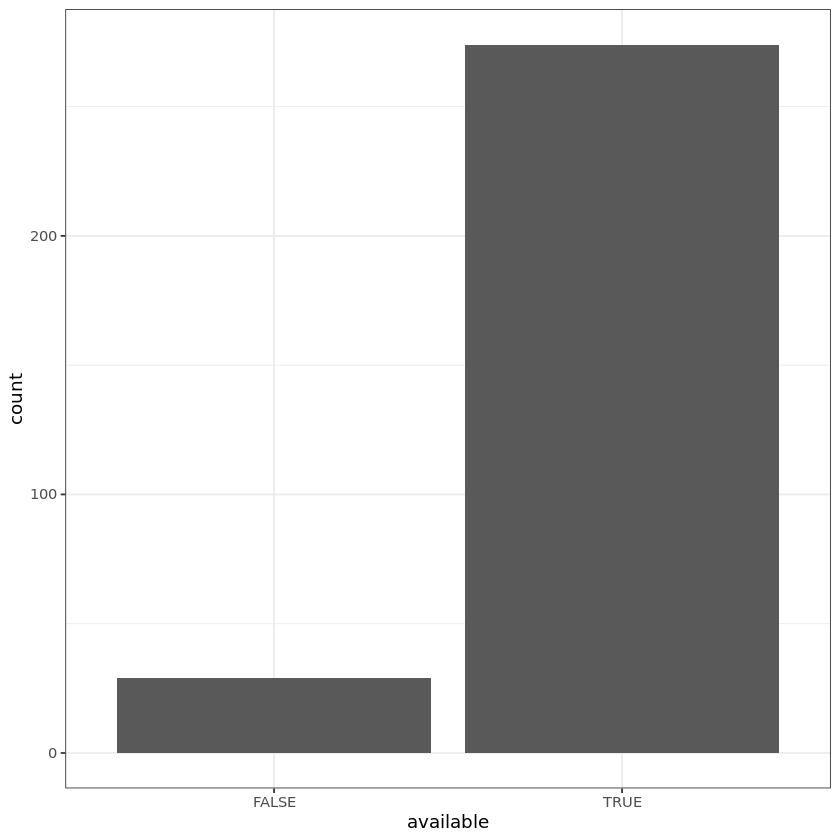

In [52]:
ggplot(matched_f, aes(x = available)) + geom_bar() + theme_bw()

3. for each species calculate the number of samples, tissues , and replicates we have with "available"==TRUE

In [53]:
NROW(matched_f)

[1] 303

In [54]:
## number of avaliable samples
matched_f <- matched_f  %>%  group_by(English) %>% mutate(n_samples = length(Tissue[available]))

In [55]:
## number of avaliable tissues
matched_f <- matched_f  %>%  group_by(English) %>% mutate(n_tissues = length(unique(Tissue[available])))

In [259]:
setDT(matched_f)

In [260]:
NROW(matched_f[English=="Chicken"])

[1] 23

In [263]:
matched_f[, replica:= sapply(Abbreviation, function(x) strsplit(as.character(x), "_")[[1]][2]),]

In [229]:
colnames(matched_f)

[1] "Fortlaufende.Nr"         "Patho.Nr"               
 [3] "English"                 "Tierart"                
 [5] "scientific_name"         "sex"                    
 [7] "age"                     "Entnahme"               
 [9] "Tissue"                  "Well_y"                 
[11] "Well_x"                  "Abbreviation"           
[13] "DNA..ng.µl."             "Volume..µl."            
[15] "DNA.prep.date"           "comment"                
[17] "Box"                     "RRBS.status"            
[19] "Experiment.ID"           "pre.BC_CT"              
[21] "Enrichment.cycles"       "Pool"                   
[23] "Adapter"                 "FlowCell"               
[25] "lane"                    "renamed"                
[27] "Experiment_new.lib.prep" "pre.BC.CT_uc"           
[29] "Adapter_uc"              "unconverted"            
[31] "renamed_uc"              "Experiment_unconverted" 
[33] "enrichtment_uc"          "Flowcell_uc"            
[35] "lane_uc"                 "ucsc_species"           
[37] "db"                      "date"                   
[39] "name"                    "DNA_vol"                
[41] "volume_used"             "Volume_left"            
[43] "available"               "n_samples"              
[45] "n_tissues"               "replica"

In [275]:
## number of avaliable replicas
matched_f <- matched_f  %>% group_by(English) %>% mutate(n_replicas = length(unique(replica[available])))

In [284]:
matched_f$Enrichment.cycles <- as.numeric(matched_f$Enrichment.cycles)

In [286]:
matched_f$Enrichment.cycles

[1]  5  8  8  5  8  5  5  8  5  4  4  4  1  4  4  4  4  4  6  4  4  5  7  7  5
 [26]  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  5 12 13  5 13  1  5  3  3
 [51]  3  1  4  4  4  4  4  2  2 13  2 12  4 13  2 13  2  4  5  3 13 13  5 13 13
 [76]  5 13  5  5  5 13  5 13  5 13  5  6  2 13  3  2 12 13 12 12  5 12 12 13 12
[101] 12 12 12  2  2 13 12 12 10  3 13 12  3  2  4  4  4  2  6  4  2  3  6  4  3
[126]  6  4  3  4  4  2  4  4  4  6  3  4  3  3  3  4  3  4  4  4  2  5  4 13  4
[151]  3 13  4  2  2  2  1 13 13  2  4  2  4  5  4  5  2  3  4  5  2  4  4  2 13
[176]  2  4  3  3 13  4  3  3  6  3  3  6  6  6  3  4 13 13  3  6  3  2  2  2 13
[201] 13 13 13 13 13 13 13 13 13 13 13  3  3  3  3  3  3  3  3  3  3  3  3  3  3
[226]  3  3  3  3 13 13 13  3  7  7  7  1  7  7  1  7  4  6  4  3  5  3  3  4  2
[251]  6  2  3  4  3  3  5  4  4  5  3

In [288]:
matched_f <- matched_f %>% group_by(English) %>% mutate(max_PCR = max(Enrichment.cycles), mean_PCR = mean(Enrichment.cycles))

In [293]:
matched_f <- matched_f %>% group_by(English) %>% mutate(percent_avail = length(available==TRUE)/length(Tissue))

In [291]:
colnames(matched_f)

[1] "Fortlaufende.Nr"         "Patho.Nr"               
 [3] "English"                 "Tierart"                
 [5] "scientific_name"         "sex"                    
 [7] "age"                     "Entnahme"               
 [9] "Tissue"                  "Well_y"                 
[11] "Well_x"                  "Abbreviation"           
[13] "DNA..ng.µl."             "Volume..µl."            
[15] "DNA.prep.date"           "comment"                
[17] "Box"                     "RRBS.status"            
[19] "Experiment.ID"           "pre.BC_CT"              
[21] "Enrichment.cycles"       "Pool"                   
[23] "Adapter"                 "FlowCell"               
[25] "lane"                    "renamed"                
[27] "Experiment_new.lib.prep" "pre.BC.CT_uc"           
[29] "Adapter_uc"              "unconverted"            
[31] "renamed_uc"              "Experiment_unconverted" 
[33] "enrichtment_uc"          "Flowcell_uc"            
[35] "lane_uc"                 "ucsc_species"           
[37] "db"                      "date"                   
[39] "name"                    "DNA_vol"                
[41] "volume_used"             "Volume_left"            
[43] "available"               "n_samples"              
[45] "n_tissues"               "replica"                
[47] "n_replicas"              "max_PCR"                
[49] "mean_PCR"                "percent_avail"

In [325]:
matched_f_summary <- unique(matched_f[, c('English','Tierart', 'scientific_name','ucsc_species','db','date','name',
                     'n_samples','n_tissues','n_replicas','max_PCR','mean_PCR','percent_avail')])

In [306]:
rank(matched_f_summary$max_PCR)

[1] 47.5 47.5 17.5 31.5 31.5 43.0 43.0 17.5 17.5 31.5 52.5 82.0 17.5 82.0 82.0
 [16] 17.5 82.0 52.5 82.0 52.5 82.0  8.0 31.5 82.0 82.0 82.0 82.0 31.5 82.0  3.5
 [31]  1.5 82.0 52.5 52.5 82.0 82.0 52.5 82.0 82.0 52.5 82.0 82.0 82.0 52.5 31.5
 [46] 31.5 31.5  3.5 17.5 82.0 82.0 17.5 82.0 82.0  8.0 82.0 82.0 82.0 17.5 31.5
 [61] 17.5 17.5 17.5  8.0  8.0 82.0  8.0 82.0 31.5 82.0 82.0 82.0 31.5 82.0 82.0
 [76] 31.5  1.5 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0
 [91] 82.0 43.0 43.0 43.0 43.0 43.0 31.5 31.5 82.0 17.5  8.0  8.0 31.5 31.5 82.0
[106] 82.0 82.0

for each of this criteria we define a rank, and then create a mean rank across all of them, to create a priority list:

In [326]:
matched_f_summary <- matched_f_summary %>%ungroup() %>% mutate(rank_PCR_max = dense_rank(max_PCR), 
                                          rank_PCR_mean = dense_rank(mean_PCR), 
                                          rank_n_samples = dense_rank(-n_samples),
                                          rank_n_replicas = dense_rank(-n_replicas))

In [327]:
setDT(matched_f_summary)

In [329]:
matched_f_summary[, mean_rank:= 0.25*(rank_PCR_mean + rank_PCR_max + rank_n_replicas+ rank_n_samples),]

In [330]:
write.csv(matched_f_summary[order(mean_rank)], "/nobackup/lab_bock/projects/DNAmeth500species/validation/genome_matches_filtered_annot_2.csv")

## Select the "test" samples, to use for the trial run

In [7]:
species_annot$DNA_conc <- as.numeric(gsub(",", ".", species_annot$`DNA (ng/µl)`))

In [8]:
species_annot[,DNA_ammount:=DNA_conc*`Volume (µl)`,]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 92 rows containing non-finite values (stat_bin).”


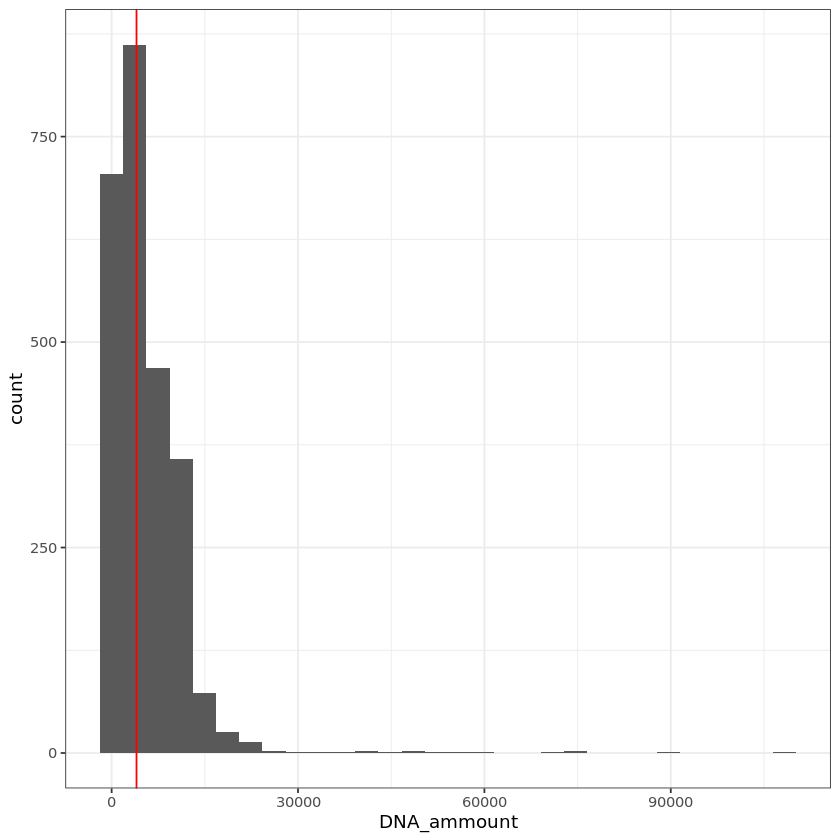

In [9]:
ggplot(species_annot, aes(x = DNA_ammount)) + geom_histogram() + geom_vline(xintercept = 4000, color = "red") + theme_bw()

In [10]:
species_annot[, volume_used:=100/species_annot$DNA_vol,]

In [46]:
species_annot[, refgenome:=ifelse(English %in% matched_f$English, "yes", "no"),]

In [47]:
colnames(species_annot)

[1] "V1"                      "Fortlaufende Nr"        
 [3] "Patho-Nr"                "English"                
 [5] "Tierart"                 "scientific_name"        
 [7] "sex"                     "age"                    
 [9] "Entnahme"                "Tissue"                 
[11] "Well_y"                  "Well_x"                 
[13] "Abbreviation"            "DNA (ng/µl)"            
[15] "Volume (µl)"             "DNA prep date"          
[17] "comment"                 "Box"                    
[19] "RRBS-status"             "Experiment ID"          
[21] "pre-BC_CT"               "Enrichment cycles"      
[23] "Pool"                    "Adapter"                
[25] "FlowCell"                "lane"                   
[27] "renamed"                 "Experiment_new lib prep"
[29] "pre-BC CT_uc"            "Adapter_uc"             
[31] "unconverted"             "renamed_uc"             
[33] "Experiment_unconverted"  "enrichtment_uc"         
[35] "Flowcell_uc"             "lane_uc"                
[37] "DNA_conc"                "DNA_ammount"            
[39] "volume_used"             "refgenome"

Warning message:
“Removed 92 rows containing non-finite values (stat_density).”


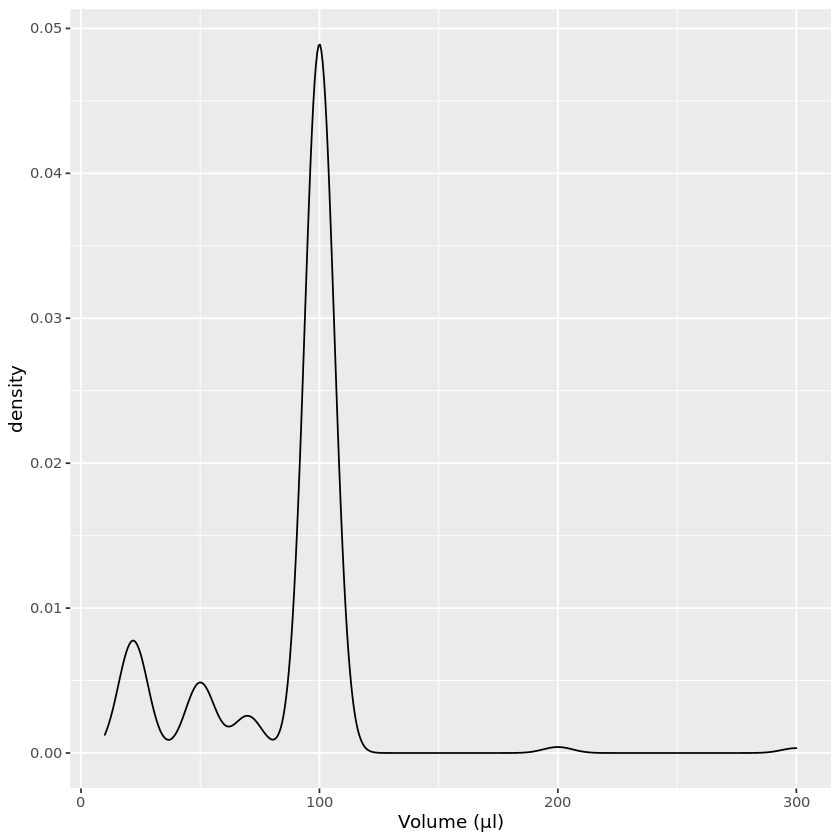

In [48]:
ggplot(species_annot, aes(x = `Volume (µl)`)) + geom_density()

##### adding the prefragmentation info

In [50]:
stats_annot <- fread("/nobackup/lab_bock/projects/DNAmeth500species/results_analysis_v1/01_basicStats/stats_annot.tsv")

In [51]:
colnames(species_annot)

[1] "V1"                      "Fortlaufende Nr"        
 [3] "Patho-Nr"                "English"                
 [5] "Tierart"                 "scientific_name"        
 [7] "sex"                     "age"                    
 [9] "Entnahme"                "Tissue"                 
[11] "Well_y"                  "Well_x"                 
[13] "Abbreviation"            "DNA (ng/µl)"            
[15] "Volume (µl)"             "DNA prep date"          
[17] "comment"                 "Box"                    
[19] "RRBS-status"             "Experiment ID"          
[21] "pre-BC_CT"               "Enrichment cycles"      
[23] "Pool"                    "Adapter"                
[25] "FlowCell"                "lane"                   
[27] "renamed"                 "Experiment_new lib prep"
[29] "pre-BC CT_uc"            "Adapter_uc"             
[31] "unconverted"             "renamed_uc"             
[33] "Experiment_unconverted"  "enrichtment_uc"         
[35] "Flowcell_uc"             "lane_uc"                
[37] "DNA_conc"                "DNA_ammount"            
[39] "volume_used"             "refgenome"              
[41] "Volume_left"

In [52]:
species_annot[Abbreviation == "PK_3_LN",c("Abbreviation", "unconverted")]

Abbreviation,unconverted
<chr>,<chr>
PK_3_LN,PK_3_LN_uc


In [53]:
species_annot_annot <- left_join(species_annot, stats_annot[, c("Sample_Name", "others", "color_class")], by = c("Abbreviation" = "Sample_Name"))

In [54]:
colnames(species_annot_annot)

[1] "V1"                      "Fortlaufende Nr"        
 [3] "Patho-Nr"                "English"                
 [5] "Tierart"                 "scientific_name"        
 [7] "sex"                     "age"                    
 [9] "Entnahme"                "Tissue"                 
[11] "Well_y"                  "Well_x"                 
[13] "Abbreviation"            "DNA (ng/µl)"            
[15] "Volume (µl)"             "DNA prep date"          
[17] "comment"                 "Box"                    
[19] "RRBS-status"             "Experiment ID"          
[21] "pre-BC_CT"               "Enrichment cycles"      
[23] "Pool"                    "Adapter"                
[25] "FlowCell"                "lane"                   
[27] "renamed"                 "Experiment_new lib prep"
[29] "pre-BC CT_uc"            "Adapter_uc"             
[31] "unconverted"             "renamed_uc"             
[33] "Experiment_unconverted"  "enrichtment_uc"         
[35] "Flowcell_uc"             "lane_uc"                
[37] "DNA_conc"                "DNA_ammount"            
[39] "volume_used"             "refgenome"              
[41] "Volume_left"             "others"                 
[43] "color_class"

In [55]:
head(matched_f)

V1,Fortlaufende Nr,Patho-Nr,English,Tierart,scientific_name,sex,age,Entnahme,Tissue,⋯,Flowcell_uc,lane_uc,DNA_conc,DNA_ammount,volume_used,ucsc_species,db,date,name,DNA_vol
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
237,892,Z/307/11,Armadillo,Guerteltier,Dasypodidae,m,juvenil,03.05.2011,Heart,⋯,NA,NA,98.7,4935,NA,Armadillo,dasNov3,Dec. 2011,Broad Institute DasNov3,NA
238,892,Z/307/11,Armadillo,Guerteltier,Dasypodidae,m,juvenil,03.05.2011,Liver,⋯,NA,NA,112.9,5645,NA,Armadillo,dasNov3,Dec. 2011,Broad Institute DasNov3,NA
239,892,Z/307/11,Armadillo,Guerteltier,Dasypodidae,m,juvenil,03.05.2011,Spleen,⋯,NA,NA,89.9,4495,NA,Armadillo,dasNov3,Dec. 2011,Broad Institute DasNov3,NA
240,892,Z/307/11,Armadillo,Guerteltier,Dasypodidae,m,juvenil,03.05.2011,Lung,⋯,283,6,96.4,4820,NA,Armadillo,dasNov3,Dec. 2011,Broad Institute DasNov3,NA
241,892,Z/307/11,Armadillo,Guerteltier,Dasypodidae,m,juvenil,03.05.2011,Lymphnode,⋯,NA,NA,84.5,4225,NA,Armadillo,dasNov3,Dec. 2011,Broad Institute DasNov3,NA
242,1111,AC/953/11,Armadillo,Guerteltier,Dasypodidae,m,juvenil,05.10.2011,Heart,⋯,NA,NA,99.8,4990,NA,Armadillo,dasNov3,Dec. 2011,Broad Institute DasNov3,NA


In [77]:
setDT(species_annot_annot)

Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“Removed 13 rows containing missing values (geom_label_repel).”
Warning message:
“ggrepel: 125 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


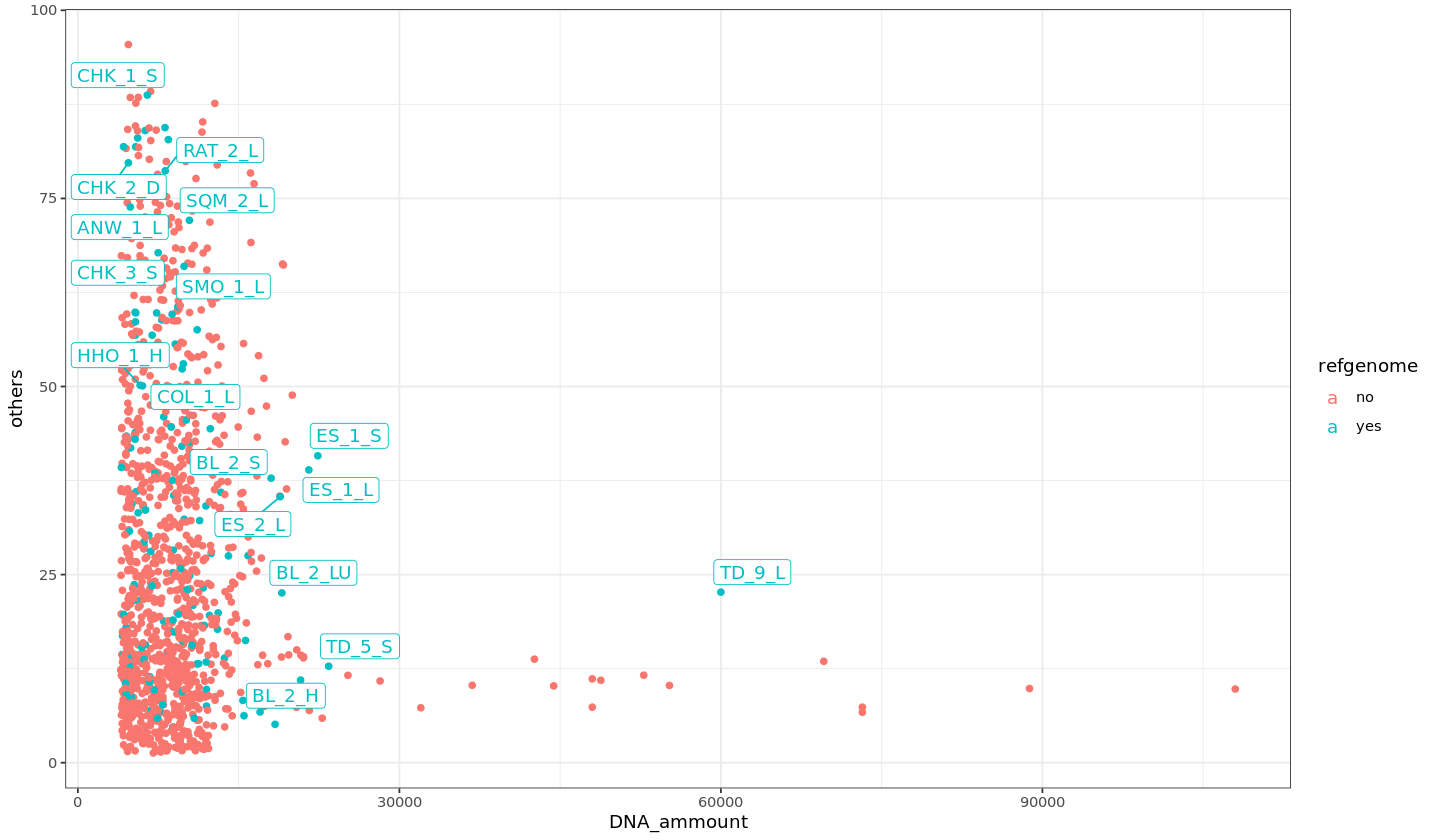

In [57]:
options(repr.plot.width = 12)
ggplot(species_annot_annot[DNA_ammount>4000,], aes(x = DNA_ammount, y = others, color = refgenome)) + theme_bw()+
            geom_point() +
        geom_label_repel(data =  species_annot_annot[refgenome=="yes" &DNA_ammount>4000 ,], aes(x = DNA_ammount, y = others,label = Abbreviation))

Warning message:
“Removed 17 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


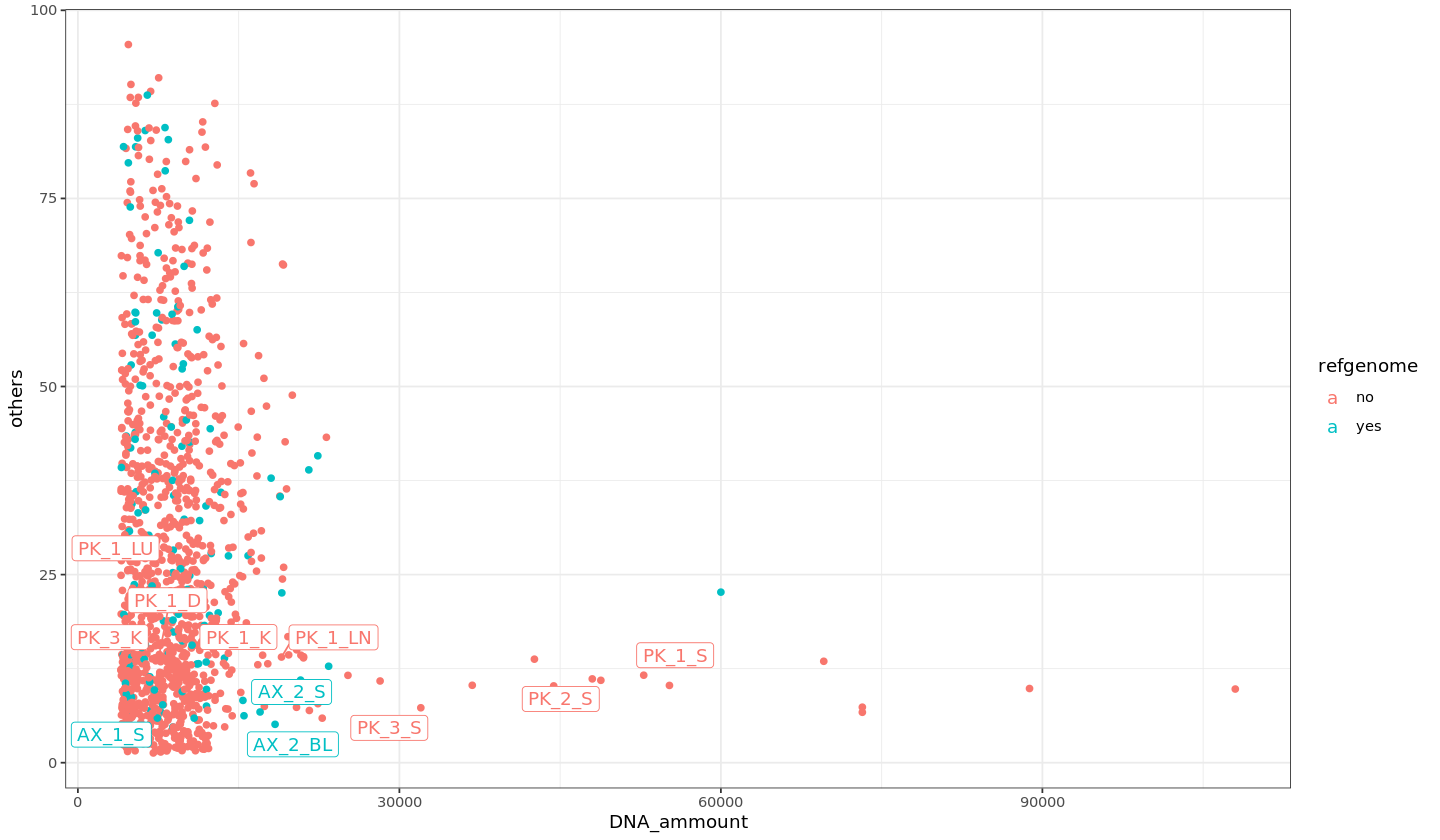

In [87]:
options(repr.plot.width = 12)
ggplot(species_annot_annot[DNA_ammount>4000,], aes(x = DNA_ammount, y = others, color = refgenome)) + theme_bw()+
            geom_point() +
        geom_label_repel(data =  species_annot_annot[(English=="Axolotl" | English=="Parma kangaroo/wallaby") &DNA_ammount>4000 ,], aes(x = DNA_ammount, y = others,label = Abbreviation))

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


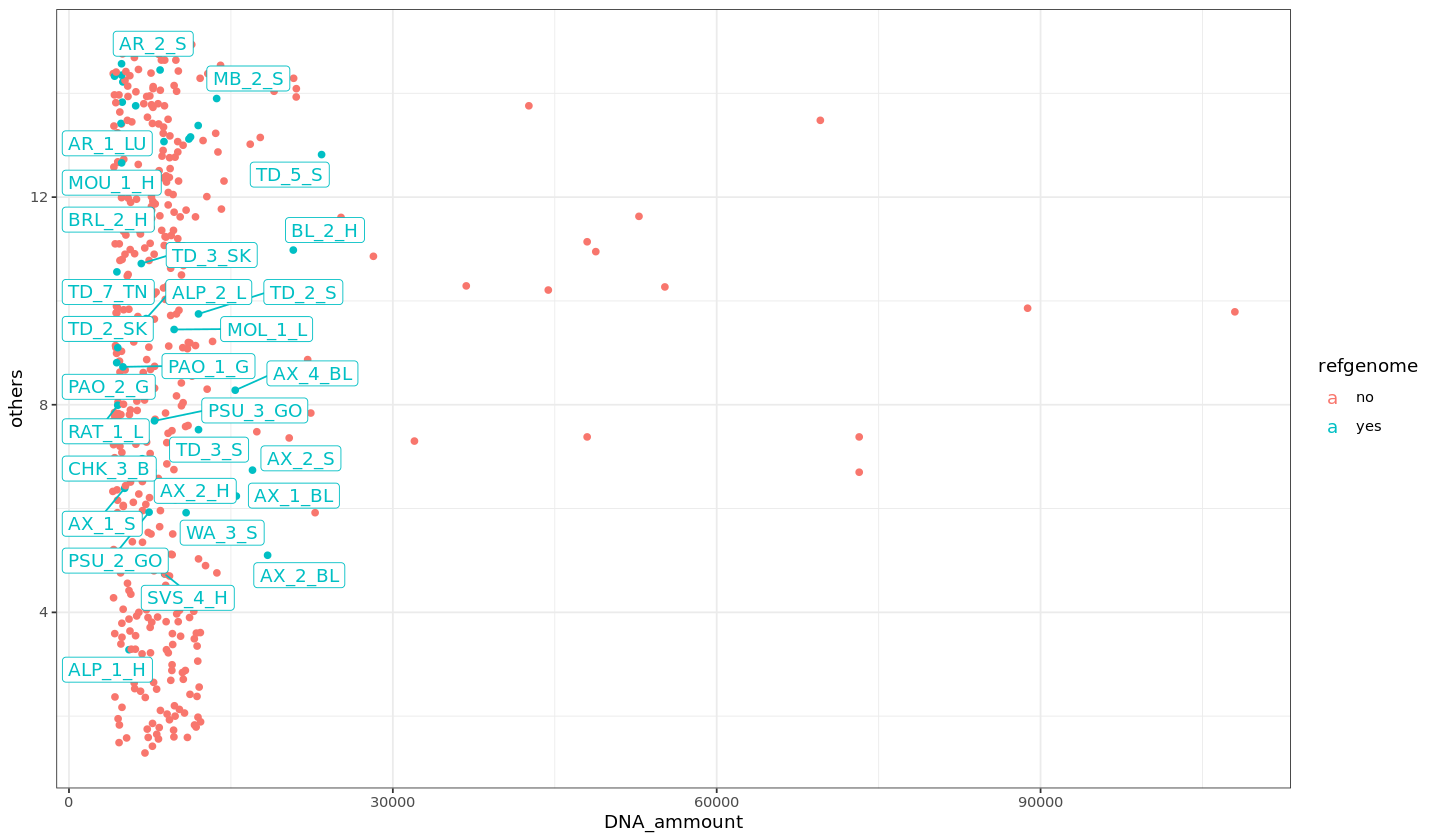

In [88]:
options(repr.plot.width = 12)
ggplot(species_annot_annot[DNA_ammount>4000 & others < 15,], aes(x = DNA_ammount, y = others, color = refgenome)) + theme_bw()+
            geom_point() +
        geom_label_repel(data =  species_annot_annot[refgenome=="yes" &DNA_ammount>4000 & others < 15,], aes(x = DNA_ammount, y = others,label = Abbreviation))

Warning message:
“Removed 131 rows containing non-finite values (stat_boxplot).”


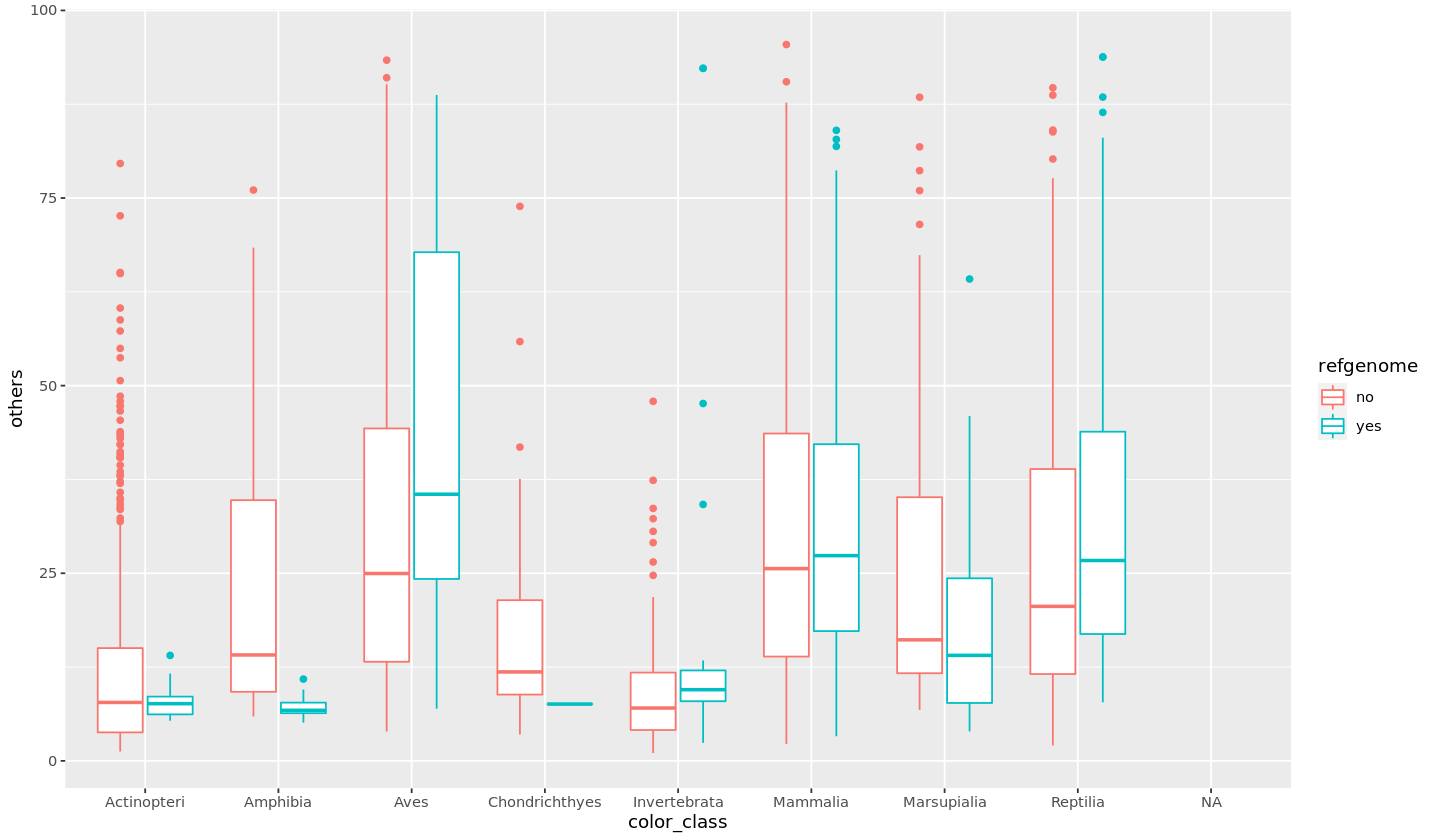

In [91]:
ggplot(species_annot_annot, aes(x = color_class, y = others, color = refgenome)) + geom_boxplot()

Warning message:
“Removed 94 rows containing non-finite values (stat_density).”


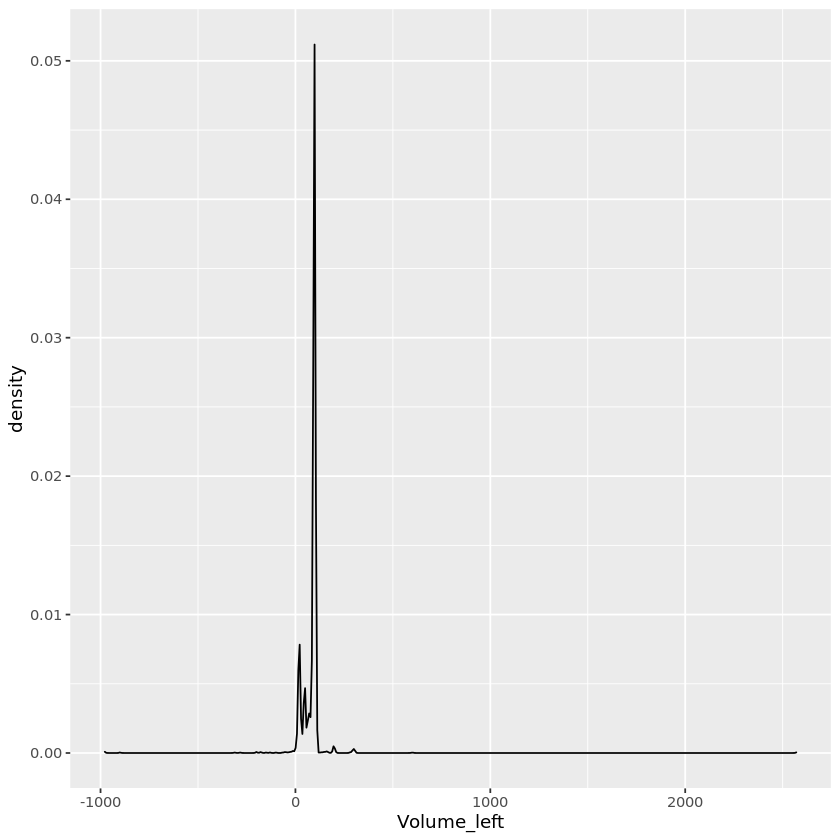

In [60]:
ggplot(species_annot_annot, aes(x = Volume_left)) + geom_density()

In [60]:
unique(species_annot_annot$English)

[1] "Parma kangaroo/wallaby"          "Yellow-bellied slider"          
  [3] "Stone marten"                    "Colorado River toad"            
  [5] "Buzzard"                         "Leaf bird"                      
  [7] "Mouflon"                         "Dice snake"                     
  [9] "Humboldt penguin"                "Mossy frog"                     
 [11] "Pricklenape agama"               "Cheetah"                        
 [13] "Vulturine guineafowl"            "Red panda"                      
 [15] "Mole salamander"                 "Bactrian camel"                 
 [17] "Helmeted water toad"             "Veiled chameleon"               
 [19] "Crow"                            "Pouched rats"                   
 [21] "Crocodile"                       "Rattlesnake"                    
 [23] "Rhinoceros iguana"               "Armadillo"                      
 [25] "European pond turtle"            "Zebra"                          
 [27] "Pin-tailed parrot finch"         "Bishop"                         
 [29] "Sunbittern"                      "Northern bald ibis"             
 [31] "Fat Dormouse"                    "Red-crowned crane"              
 [33] "stone marten"                    "White-tailed eagle"             
 [35] "Beaded lizard"                   "Pink-tongued Skink"             
 [37] "Naked mole-rat"                  "Capybara"                       
 [39] "Ring-tailed lemur"               "Barbary macaque"                
 [41] "Elephant shrew"                  "Pancake tortoise"               
 [43] "Megabat"                         "European bee-eater"             
 [45] "Muntjac"                         "Baja Rock Lizard"               
 [47] "Pelican"                         "Possum"                         
 [49] "Seal"                            "Flamingo"                       
 [51] "Bearded dragon"                  "African grey parrot"            
 [53] "Indian python"                   "Pied avocet"                    
 [55] "Rhea"                            "Cotton-top tamarin"             
 [57] "Ural owl"                        "Hermanns tortoise"              
 [59] "Nyala"                           "Uromastyx"                      
 [61] "Sand viper"                      "Cougar"                         
 [63] "Siberian tiger"                  "Jaguar"                         
 [65] "Timberwolf"                      "Brown bear"                     
 [67] "Banded mongoose"                 "Dromedary"                      
 [69] "European otter"                  "Southern sea lion"              
 [71] "Badger"                          "Common snapping turtle"         
 [73] "Old World porcupine"             "Seba's short-tailed bat"        
 [75] "Long-eared owl"                  "Aesculapian snake"              
 [77] "Common European viper"           "Ghost frog"                     
 [79] "Anderson's Salamander"           "White cockatoo"                 
 [81] "Eastern imperial eagle"          "Southern rockhopper penguin"    
 [83] "Raccoon"                         "Budgerigar"                     
 [85] "Neurergus"                       "Coypu"                          
 [87] "Fat-tailed gerbil"               "Borneo eared frog"              
 [89] "Gekko"                           "Ball python"                    
 [91] "Elephant bird"                   "Roan antelope"                  
 [93] "Dalmatian pelican"               "Squirrel monkey"                
 [95] "African spurred tortoise"        "Ocelot gecko"                   
 [97] "Red-eared slider"                "Guenon"                         
 [99] "Golden jackal"                   "Giraffe"                        
[101] "Emu"                             "Little owl"                     
[103] "Multi-coloured Tree Lizard"      "Mountain hare"                  
[105] "Blue-and-yellow macaw"           "Black-winged lovebird"          
[107] "Kobra"                           "Palm cockatoo"                  
[109] 

In [62]:
colnames(species_annot_annot)

[1] "V1"                      "Fortlaufende Nr"        
 [3] "Patho-Nr"                "English"                
 [5] "Tierart"                 "scientific_name"        
 [7] "sex"                     "age"                    
 [9] "Entnahme"                "Tissue"                 
[11] "Well_y"                  "Well_x"                 
[13] "Abbreviation"            "DNA (ng/µl)"            
[15] "Volume (µl)"             "DNA prep date"          
[17] "comment"                 "Box"                    
[19] "RRBS-status"             "Experiment ID"          
[21] "pre-BC_CT"               "Enrichment cycles"      
[23] "Pool"                    "Adapter"                
[25] "FlowCell"                "lane"                   
[27] "renamed"                 "Experiment_new lib prep"
[29] "pre-BC CT_uc"            "Adapter_uc"             
[31] "unconverted"             "renamed_uc"             
[33] "Experiment_unconverted"  "enrichtment_uc"         
[35] "Flowcell_uc"             "lane_uc"                
[37] "DNA_conc"                "DNA_ammount"            
[39] "volume_used"             "refgenome"              
[41] "Volume_left"             "others"                 
[43] "color_class"

In [66]:
species_annot_annot$Well_y

[1] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "" 
  [19] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "" 
  [37] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "" 
  [55] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "" 
  [73] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "" 
  [91] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "" 
 [109] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "" 
 [127] ""  ""  ""  ""  ""  ""  ""  "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [145] "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C"
 [163] "C" "C" "C" "C" "C" "C" "C" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D"
 [181] "D" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "F" "F" "F" "F" "F"
 [199] "F" "F" "F" "F" "F" "F" "F" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [217] "G" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "A" "A" "A" "A" "A"
 [235] "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [253] "B" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "D" "D" "D" "D" "D"
 [271] "D" "D" "D" "D" "D" "D" "D" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E"
 [289] "E" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "G" "G" "G" "G" "G"
 [307] "G" "G" "G" "G" "G" "G" "G" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H"
 [325] "H" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B"
 [343] "B" "B" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [361] "C" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "E" "E" "E" "E" "E"
 [379] "E" "E" "E" "E" "E" "E" "E" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F"
 [397] "F" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "H" "H" "H" "H" "H"
 [415] "H" "H" "H" "H" "H" "H" "H" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [433] "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C"
 [451] "C" "C" "C" "C" "C" "C" "C" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D"
 [469] "D" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "F" "F" "F" "F" "F"
 [487] "F" "F" "F" "F" "F" "F" "F" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [505] "G" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "A" "A" "A" "A" "A"
 [523] "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [541] "B" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "D" "D" "D" "D" "D"
 [559] "D" "D" "D" "D" "D" "D" "D" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E"
 [577] "E" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "G" "G" "G" "G" "G"
 [595] "G" "G" "G" "G" "G" "G" "G" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H"
 [613] "H" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B"
 [631] "B" "B" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "C"
 [649] "C" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "E" "E" "E" "E" "E"
 [667] "E" "E" "E" "E" "E" "E" "E" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "F"
 [685] "F" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "H" "H" "H" "H" "H"
 [703] "H" "H" "H" "H" "H" "H" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [721] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C" "C"
 [739] "C" "C" "C" "C" "C" "C" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D" "D"
 [757] "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "F" "F" "F" "F" "F" "F"
 [775] "F" "F" "F" "F" "F" "F" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G" "G"
 [793] "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" "H" ""  ""  ""  ""  ""  "" 
 [811] ""  ""  ""  ""  ""  ""  ""  ""  ""  ""  "A" "A" "A" "A" "A" "A" "A" "A"
 [829] "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "C" "C"
 [847] "C" "C" "C" "C" "C" "C" "C" "C" "C" "C" "D" "D" "D" "D" "D" "D" "D" "D"
 [865] "D" "D" "D" "D" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "E" "F" "F"
 [883] "F" "F" "F" "F" "F" "F" "F" "F" "F" "F" "G" "G" "G" "G" "G" "G" "G" "G"
 [901] "G" "G" "G" "G" "H" "H" "H" "H" "H" "H" "H" "H

In [77]:
selection <- species_annot_annot[English %in% c("Parma kangaroo/wallaby", "Tasmanian devil", "Axolotl" ), 
                    c("English", "Abbreviation", "Tissue", "DNA_ammount","others",'Well_y','Well_x', 'FlowCell','lane' )] %>%
filter(Tissue != "Cellline" & Tissue != "Tumour_mid") %>%
                    group_by(English) %>% arrange(desc(DNA_ammount), .by_group = TRUE) %>% slice(1:2)

In [78]:
write.table(selection, "../meta/WGBS_to_test.csv", sep = ";", quote = F, row.names = F)

In [198]:
unmatched <- unmatched[5*volume_used < Volume_left]

In [205]:
unmatched[order(Volume_left, decreasing = T),]

Fortlaufende.Nr,Patho.Nr,English,Tierart,scientific_name,sex,age,Entnahme,Tissue,Well_y,⋯,unconverted,renamed_uc,Experiment_unconverted,enrichtment_uc,Flowcell_uc,lane_uc,DNA_vol,volume_used,Volume_left,available
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<lgl>
934,Z/459/11,Crocodile,Krokodil,Crocodylia,m,juvenil,21.06.2011,Heart,G,⋯,,,,NA,NA,NA,-0.04,-2500.0000000,2570.0000,TRUE
559,Z/573/10,African grey parrot,Graupapagei,Psittacus,f,NA,27.09.2010,Lung,H,⋯,,,,NA,NA,NA,-0.20,-500.0000000,600.0000,TRUE
2764,Z/63/14,Stone marten,Steinmarder,Martes foina,f,1 j,21.01.2014,Spleen,,⋯,,,,NA,NA,NA,360.00,0.2777778,299.7222,TRUE
1480,AC/251/12,Humboldt penguin,Humboldtpinguin,Spheniscus humboldti,f,adult,07.05.2012,Spleen,,⋯,,,,NA,NA,NA,296.00,0.3378378,299.6622,TRUE
2769,Z/68/14,Stone marten,Steinmarder,Martes foina,f,adult,21.01.2014,Spleen,,⋯,,,,NA,NA,NA,244.00,0.4098361,299.5902,TRUE
2769,Z/68/14,Stone marten,Steinmarder,Martes foina,f,adult,21.01.2014,Lymphnode,,⋯,,,,NA,NA,NA,244.00,0.4098361,299.5902,TRUE
2768,Z/67/14,Stone marten,Steinmarder,Martes foina,f,adult,21.01.2014,Lymphnode,,⋯,,,,NA,NA,NA,232.00,0.4310345,299.5690,TRUE
2768,Z/67/14,Stone marten,Steinmarder,Martes foina,f,adult,21.01.2014,Spleen,,⋯,,,,NA,NA,NA,184.00,0.5434783,299.4565,TRUE
85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Spleen,,⋯,,,,NA,NA,NA,176.00,0.5681818,299.4318,TRUE


In [206]:
length(grep("Tumour", Tissue)) == 0) 

[1] "Fortlaufende.Nr"         "Patho.Nr"               
 [3] "English"                 "Tierart"                
 [5] "scientific_name"         "sex"                    
 [7] "age"                     "Entnahme"               
 [9] "Tissue"                  "Well_y"                 
[11] "Well_x"                  "Abbreviation"           
[13] "DNA..ng.µl."             "Volume..µl."            
[15] "DNA.prep.date"           "comment"                
[17] "Box"                     "RRBS.status"            
[19] "Experiment.ID"           "pre.BC_CT"              
[21] "Enrichment.cycles"       "Pool"                   
[23] "Adapter"                 "FlowCell"               
[25] "lane"                    "renamed"                
[27] "Experiment_new.lib.prep" "pre.BC.CT_uc"           
[29] "Adapter_uc"              "unconverted"            
[31] "renamed_uc"              "Experiment_unconverted" 
[33] "enrichtment_uc"          "Flowcell_uc"            
[35] "lane_uc"                 "DNA_vol"                
[37] "volume_used"             "Volume_left"            
[39] "available"

In [208]:
colnames(species_annot)

[1] "Fortlaufende.Nr"         "Patho.Nr"               
 [3] "English"                 "Tierart"                
 [5] "scientific_name"         "sex"                    
 [7] "age"                     "Entnahme"               
 [9] "Tissue"                  "Well_y"                 
[11] "Well_x"                  "Abbreviation"           
[13] "DNA..ng.µl."             "Volume..µl."            
[15] "DNA.prep.date"           "comment"                
[17] "Box"                     "RRBS.status"            
[19] "Experiment.ID"           "pre.BC_CT"              
[21] "Enrichment.cycles"       "Pool"                   
[23] "Adapter"                 "FlowCell"               
[25] "lane"                    "renamed"                
[27] "Experiment_new.lib.prep" "pre.BC.CT_uc"           
[29] "Adapter_uc"              "unconverted"            
[31] "renamed_uc"              "Experiment_unconverted" 
[33] "enrichtment_uc"          "Flowcell_uc"            
[35] "lane_uc"